<B> <CENTER> <H1> Breast Cancer Analysis </H1> </CENTER> </B>

In [1]:
# The first step is to import the python packages - pandas , numpy , matplotlib and seaborn

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pylab as pl
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

<B>We read the input dataset "breast_cancer.csv" onto to dataframe and display for first 3 and last 3 records</B>

In [57]:
df = pd.read_csv("breast_cancer.csv")

In [4]:
# We check the dimensions and # of tuples and attributes contained in the dataset
# We also inspect each of the attributes using info that gives name , no. of values , if non null and attr type</B>

In [58]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [59]:
df.tail(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [60]:
df.shape

(569, 32)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                565 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    561 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

<B>Conclusion</B> 

The input csv 
- contains 569 rows / tuples  and total 32 columns / features

There are 32 attributes in total 
- 30 attributes are continuous variables (float values) -> To be cleansed for data quality issues and normalised 
- 1 attribute , diagnosis is class variable / categorical (object type - str) -> To be remapped to numeric in Feature Engg
- 1 attribute , ID is identifier which is discrete variable -> Can be dropped in Feature Selection


In [63]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,565.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,561.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.136894,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.291193,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.530486,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.837590,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.030000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.980000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.850000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.810000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<B> Data Visualization </B>

In [64]:
#Checking if the dataset is balanced w.r.t class variable
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

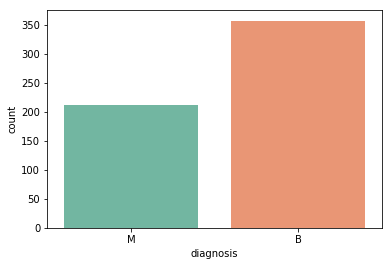

In [66]:
# count plots for categorical variable 
sns.countplot(x ='diagnosis', data = df,palette = "Set2")
# Show the plot
plt.show()

We can see that out of total 569 tuples 
- 62% of tuples are classified as "B" and 37% are classified as "M"

<B>For continuous features , we are plotting the histograms and boxplots to see the spread of the data</B>

NOTE :
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [67]:
#Histogram for continuous variable
ds=df.copy()
ds.dropna (inplace = True)  #temporarily dropping NA/NULL to facilitate histogram for all continuous attributes

feature_list=ds.columns.values.tolist()

skewDetails=feature_list[2:]
skewValues= []

for f in feature_list[2:]:
    skewValues.append(np.round(skew(ds[f]),3))

skewds = pd.DataFrame(list(zip(skewDetails, skewValues)),
               columns =['Feature', 'Skewness'])

print ('Below are highly skewed <-1 or >1')
print (skewds[(skewds.Skewness < -1) | (skewds.Skewness > 1)])

print ('\nBelow are moderately skewed -1 to -0.5 or 0.5 to 1')
print (skewds[((skewds.Skewness > -1) & (skewds.Skewness < -0.5))|(skewds.Skewness > 0.5) & (skewds.Skewness < 1)])

print ('\nBelow are normally distributed -0.5 to 0.5')
print (skewds[(skewds.Skewness > -0.5) & (skewds.Skewness < 0.5)])


Below are highly skewed <-1 or >1
                    Feature  Skewness
3                 area_mean     1.643
5          compactness_mean     1.103
6            concavity_mean     1.368
7       concave points_mean     1.152
9    fractal_dimension_mean     1.319
10                radius_se     3.078
11               texture_se     1.657
12             perimeter_se     3.443
13                  area_se     5.415
14            smoothness_se     2.361
15           compactness_se     1.912
16             concavity_se     5.149
17        concave points_se     1.434
18              symmetry_se     1.842
19     fractal_dimension_se     3.932
20             radius_worst     1.106
22          perimeter_worst     1.133
23               area_worst     1.855
25        compactness_worst     1.498
26          concavity_worst     1.163
28           symmetry_worst     1.380
29  fractal_dimension_worst     1.680

Below are moderately skewed -1 to -0.5 or 0.5 to 1
          Feature  Skewness
0     radius

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


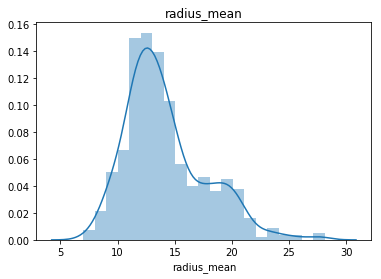

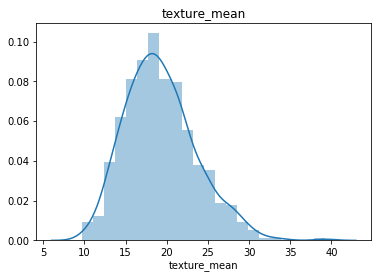

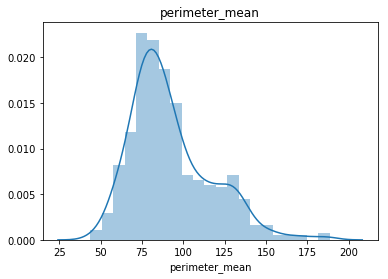

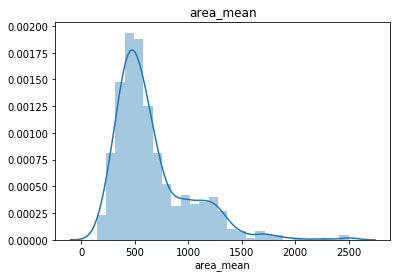

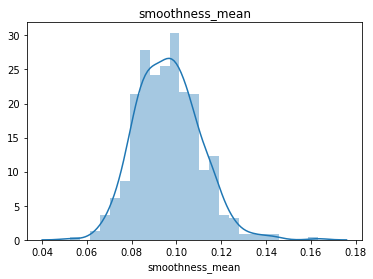

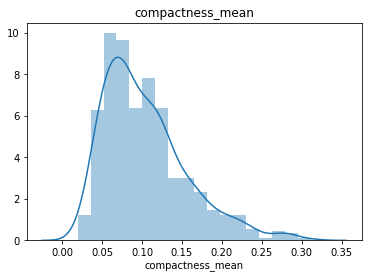

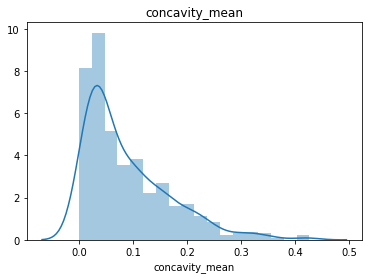

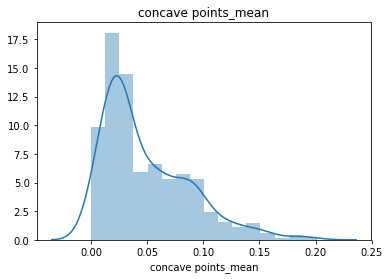

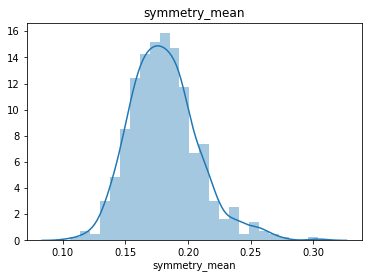

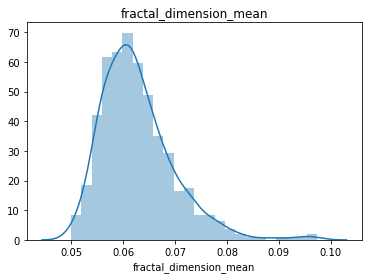

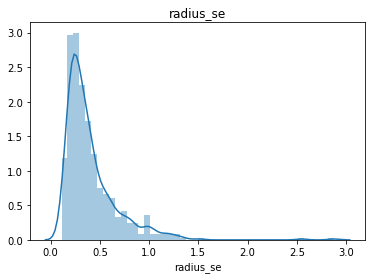

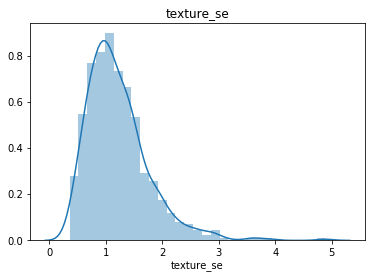

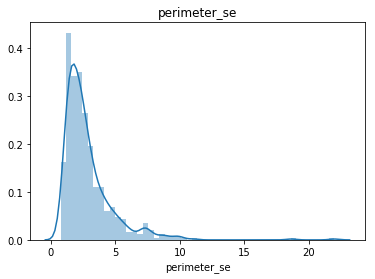

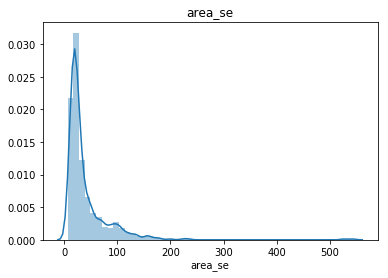

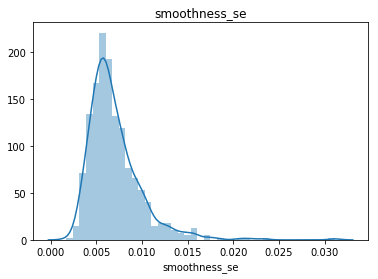

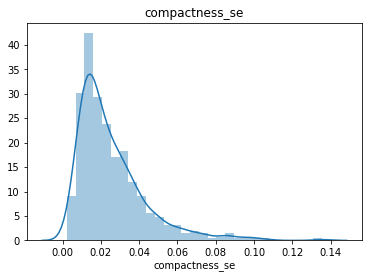

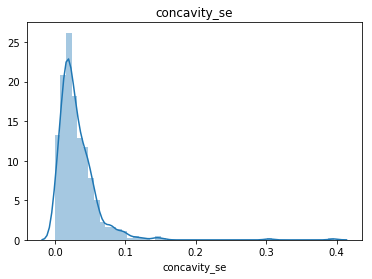

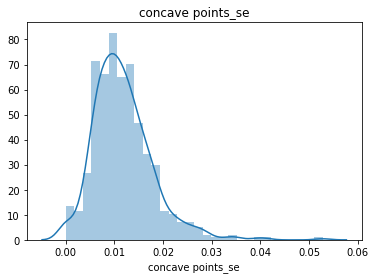

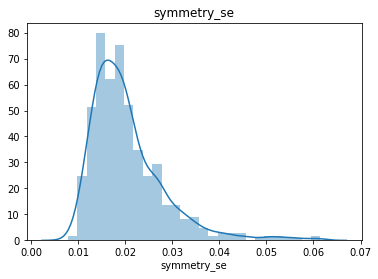

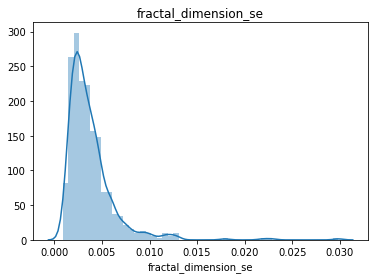

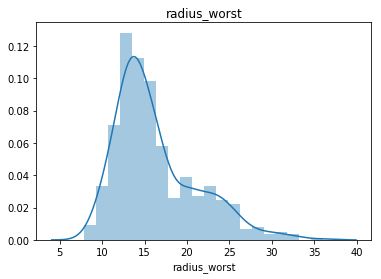

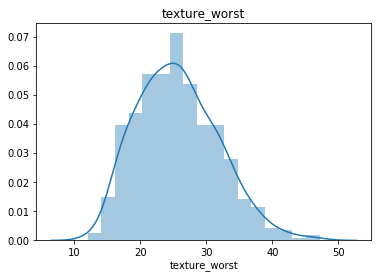

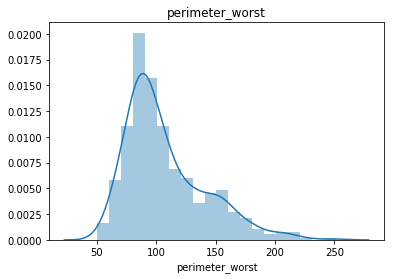

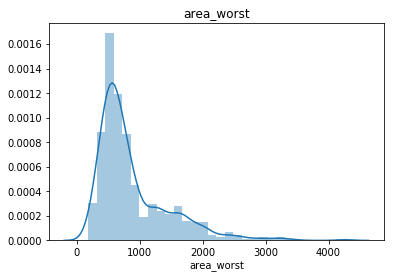

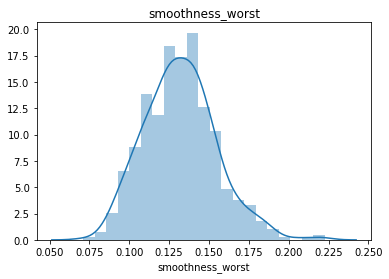

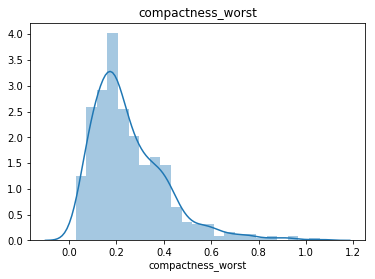

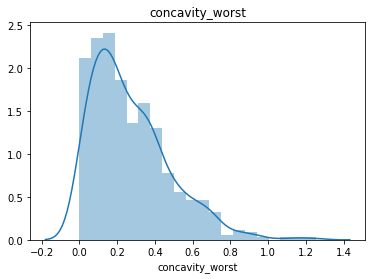

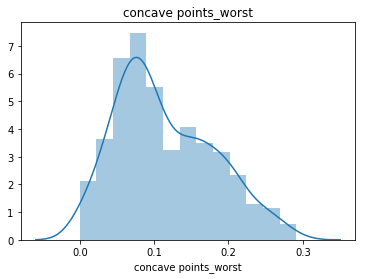

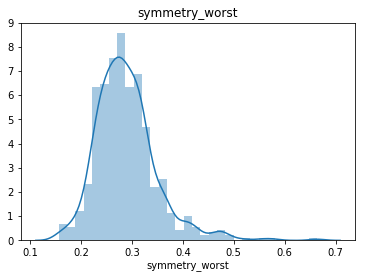

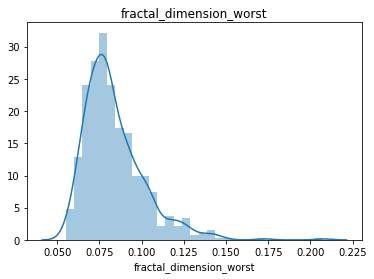

In [68]:

feature_list=ds.columns.values.tolist()

for f in feature_list[2:]:
      
    plt.figure()
    sns.distplot(ds[f])
    plt.title(f)
    

<B> Data Wrangling </B>

Handling the categorical variable - Diagnosis

In [69]:
ds=df.copy()
ds['diagnosis'].nunique()

2

In [70]:
ds['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [71]:
#Encoding the diagnosis class values to numeric

ds['diagnosis'].replace(['M','B'],[1,0],inplace=True)

In [72]:
ds['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

 <B> Analyzing the dataset for NANs and NULLs </B>

In [73]:
ds.isna().sum()

id                         0
diagnosis                  0
radius_mean                4
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    8
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               8
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [74]:
ds.isna().sum().sum() #empty values in each col

20

In [75]:
nan_cols=ds.columns[ds.isna().any()].tolist()
print('Attributes that have NAN/NULL values in the dataset')
print(nan_cols)
print()

print('Examining how much % of the attribute has missing values')

for f in nan_cols :
    print('Attribute ',f,' has ', np.round(ds[f].isna().sum() / len(ds),4),  ' % NAN values')


Attributes that have NAN/NULL values in the dataset
['radius_mean', 'area_se', 'radius_worst']

Examining how much % of the attribute has missing values
Attribute  radius_mean  has  0.007  % NAN values
Attribute  area_se  has  0.0141  % NAN values
Attribute  radius_worst  has  0.0141  % NAN values


In [76]:
ds.radius_mean.describe()

count    565.000000
mean      14.136894
std        3.530486
min        6.981000
25%       11.700000
50%       13.370000
75%       15.850000
max       28.110000
Name: radius_mean, dtype: float64

In [77]:
ds.area_se.describe()

count    561.000000
mean      40.279319
std       45.646436
min        6.802000
25%       17.850000
50%       24.440000
75%       45.190000
max      542.200000
Name: area_se, dtype: float64

In [78]:
ds.radius_worst.describe()

count    561.000000
mean      16.291193
std        4.837590
min        7.930000
25%       13.030000
50%       14.980000
75%       18.810000
max       36.040000
Name: radius_worst, dtype: float64

<B> Dropping the NA records or we can fill with the median as we dont see many outliers </B>

- In this dataset % of missing values is roughly about 20 tuples ~3% of original data
- For now we will drop those tuples

In [79]:
print ('Dataset before dropna' ,ds.shape)
print(ds.isna().sum().sum())
ds.dropna (inplace = True)
print ('Dataset after dropna' ,ds.shape)
print(ds.isna().sum().sum())


Dataset before dropna (569, 32)
20
Dataset after dropna (550, 32)
0


<B> Checking for duplicates </B>

In [80]:
ds.duplicated().sum()

0

<B> Dropping the ID column </B>

In [81]:
# Drop the label 'ID' as it not value adding feature to subsequent staged ML pipeline
ds=ds.drop(['id'], axis=1)

In [82]:
ds.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


<B> <H1> Feature Selection </H1> </B>

<B> <H2> Method 1 - Using Correlation Analysis </H2> </B>

- The correlation coefficient can range in value from −1 to +1. 
- The larger the absolute value of the coefficient, the stronger the relationship between the variables.
- Values <-0.5 & >0.5 are indicative of strong correlation

<B> Correlation analysis </B>

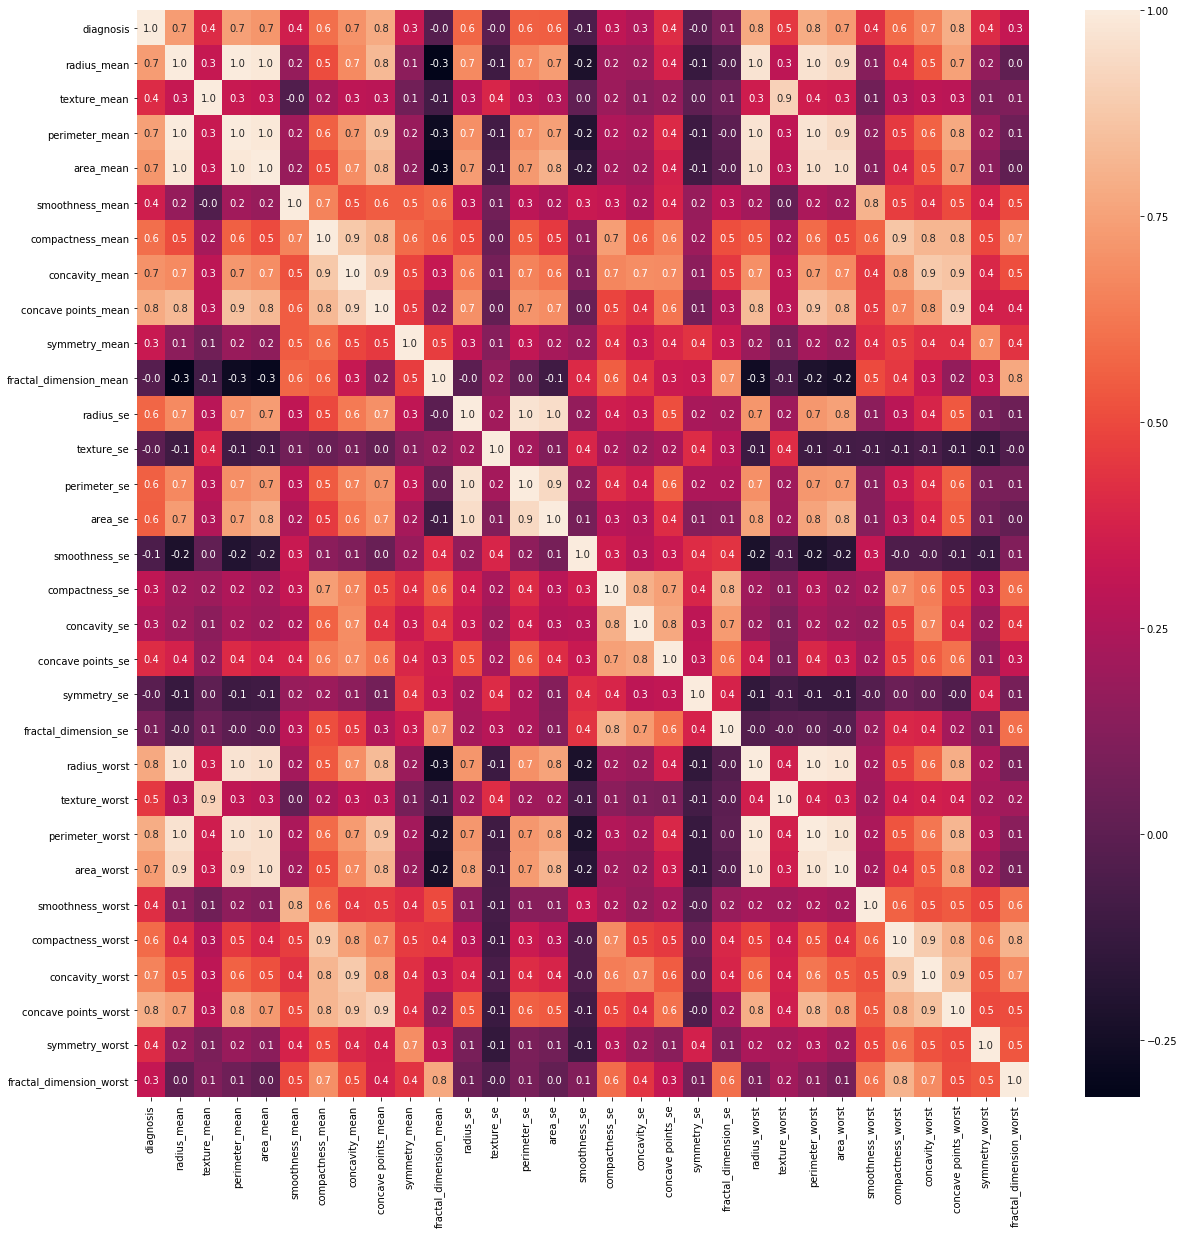

In [83]:
#Analyzing the correlation of independent variables on the class variable - diagnosis
dfc=ds.copy()

#correlation map
plt.subplots(figsize=(20, 20))
sns.heatmap(dfc.corr(), annot=True, fmt= '.1f')

Below features are strongly correlated with class variable - diagnosis
concave points_worst    0.793694
perimeter_worst         0.784109
concave points_mean     0.781109
radius_worst            0.778164
perimeter_mean          0.746549
area_worst              0.735835
radius_mean             0.734035
area_mean               0.713195
concavity_mean          0.702090
concavity_worst         0.659737
compactness_mean        0.600984
compactness_worst       0.590563
radius_se               0.572376
perimeter_se            0.560479
area_se                 0.551895
Name: diagnosis, dtype: float64
Series([], Name: diagnosis, dtype: float64)


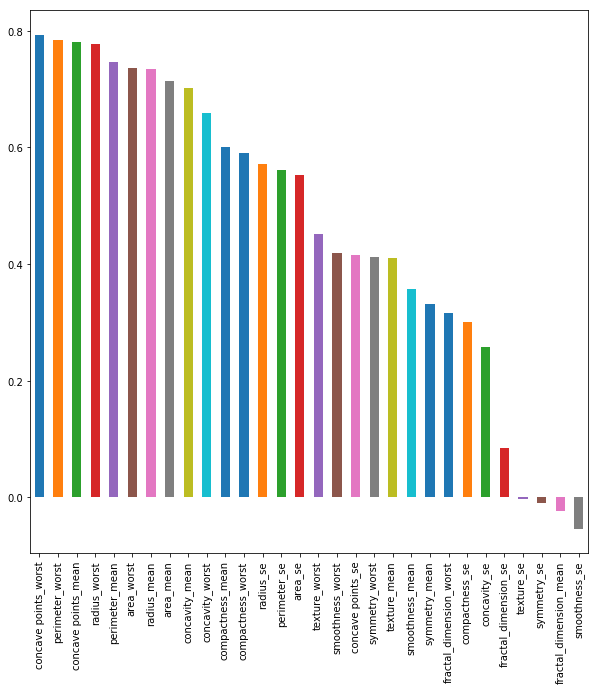

In [84]:
#Analyzing the correlation of independent variables on the class variable - diagnosis
corr=dfc.corr()['diagnosis']
corr=corr.sort_values(ascending=False)

corr.drop(index=corr.index[0], 
        axis=0, 
        inplace=True)

plt.subplots(figsize=(10, 10))
corr.plot('bar')

print ('Below features are strongly correlated with class variable - diagnosis')
print(corr[corr >= 0.5])
print(corr[corr <= -0.5])

<B>Identifying potential duplicate / dependent features </B>

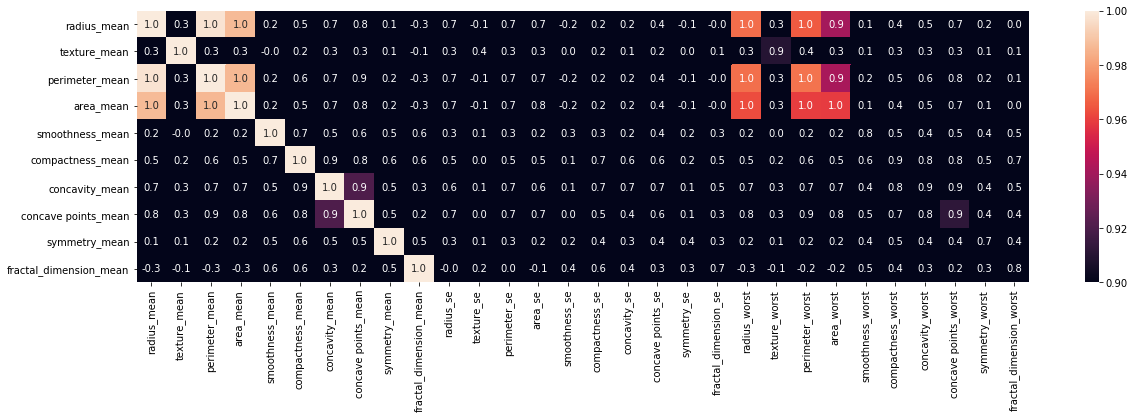

In [85]:
#correlation map b/w independent variables to find redundant attributes

dfcpy=ds.copy()

dfcpy=dfcpy.drop(['diagnosis'], axis=1)

plt.subplots(figsize=(20, 5))
sns.heatmap(dfcpy.corr().iloc[0:10], annot=True, fmt= '.1f',vmin=0.9)

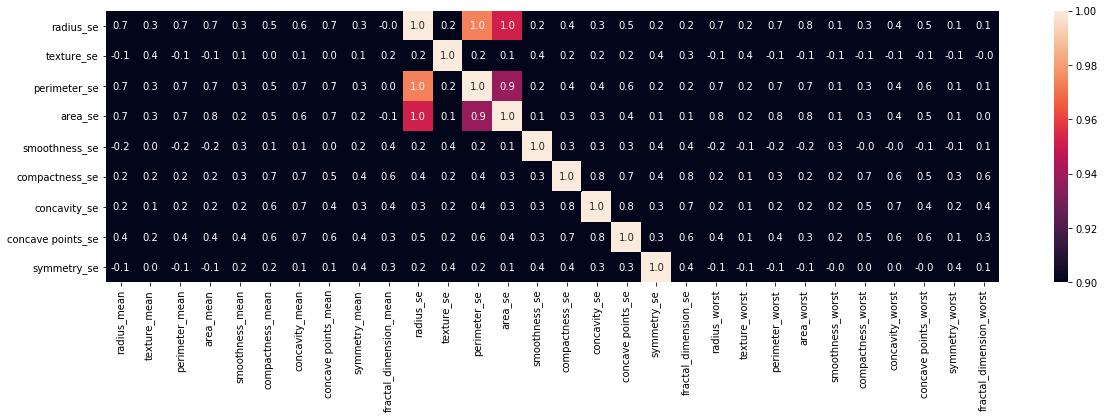

In [31]:
plt.subplots(figsize=(20, 5))
sns.heatmap(dfcpy.corr().iloc[10:19], annot=True, fmt= '.1f',vmin=0.9)

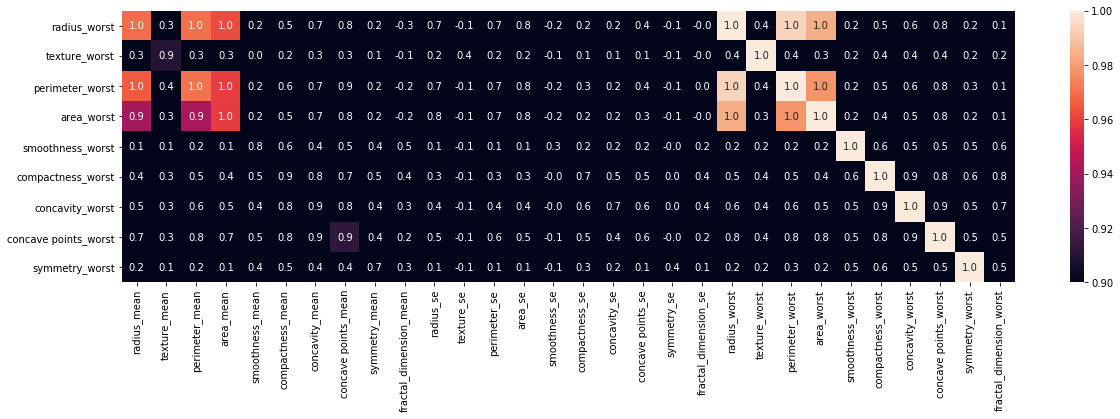

In [86]:
plt.subplots(figsize=(20, 5))
sns.heatmap(dfcpy.corr().iloc[20:29], annot=True, fmt= '.1f',vmin=0.9)

In [33]:
# print (type(dfc.corr()))

# # determining the name of the file
# file_name = 'dfccorr.xlsx'
  
# # saving the excel
# dfc.corr().to_excel(file_name)

# import os
# print(os.path.abspath(file_name))

<B> <H2> Method 2 - Using Information Gain </H2> </B>

- Information gain can also be used for feature selection, by evaluating the gain of each variable in the context of the target variable.
- Mutual information is always larger than or equal to zero, where the larger the value, the greater the relationship between the two variables. If the calculated result is zero, then the variables are independent.
- Mutual Information and Information Gain are the same thing, although the context or usage of the measure often gives rise to the different names

Below are TOP 10 features that have high value of InfoGain and hence more appropriate to be chosen for model

Feature  InfoGain
     perimeter_worst  0.462137
 concave points_mean  0.444462
          area_worst  0.442429
        radius_worst  0.440778
concave points_worst  0.426444
      perimeter_mean  0.397569
      concavity_mean  0.371702
           area_mean  0.356357
         radius_mean  0.345530
             area_se  0.306083


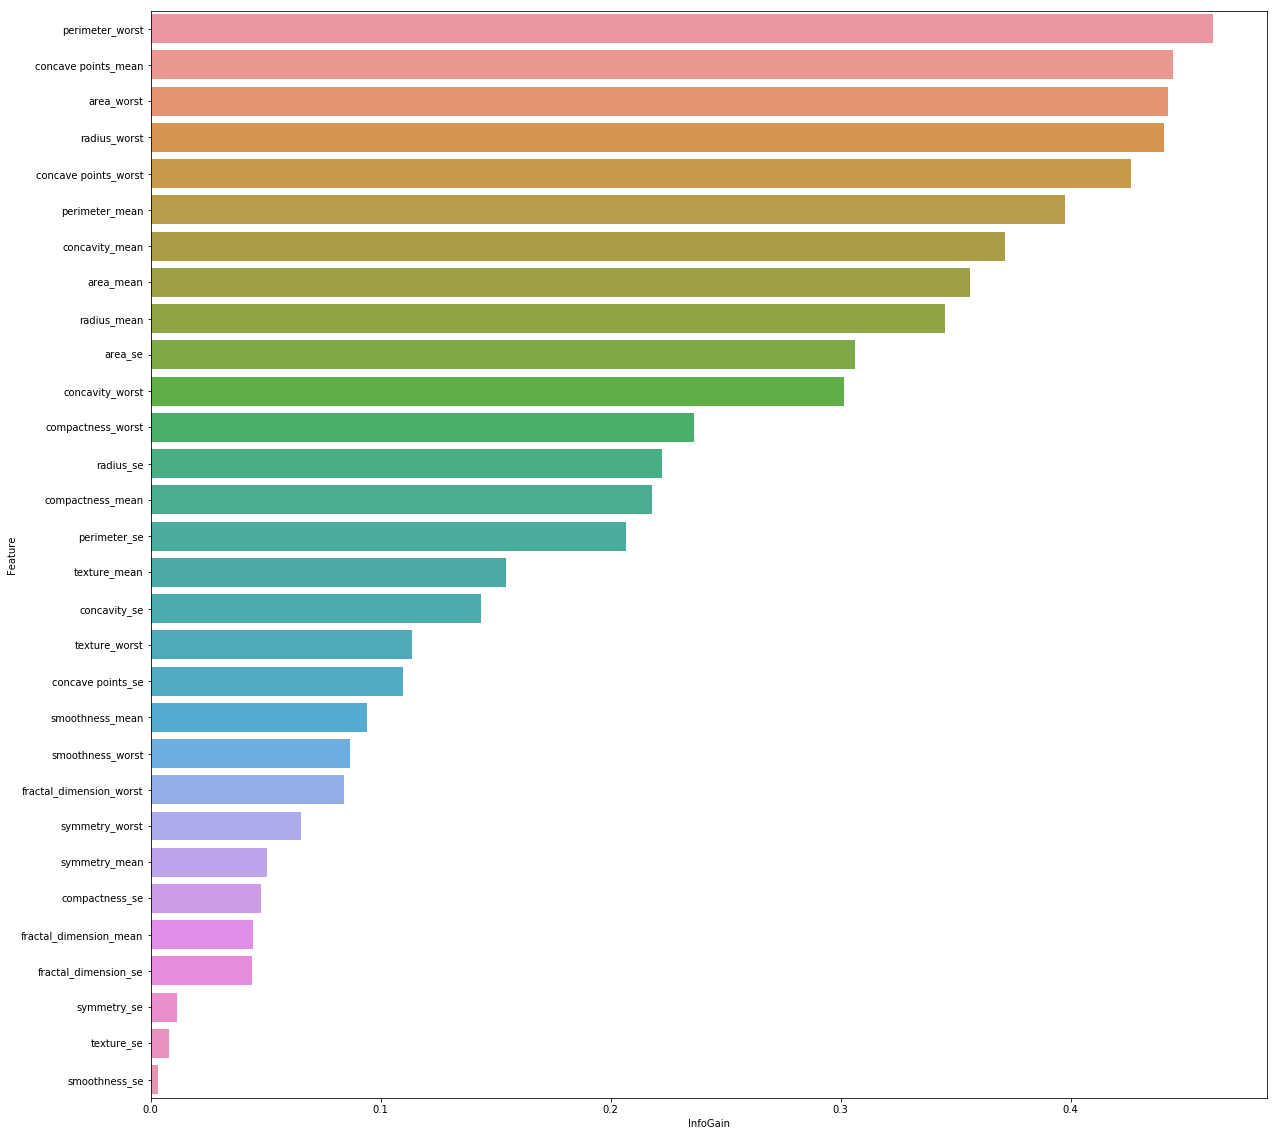

In [87]:
#Computing the infogain of independent variables with the dependent variable - diagnosis
dfc=ds.copy()

x_train,x_test,y_train,y_test=train_test_split(dfc.drop(labels=['diagnosis'], axis=1),dfc['diagnosis'],test_size=0.3,
    random_state=0)

from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
info_gain = mutual_info_classif(x_train, y_train)

xfeature_list=x_train.columns.values.tolist()

infoGainDs = pd.DataFrame(list(zip(xfeature_list, info_gain)),
               columns =['Feature', 'InfoGain'])

infoGainDs=infoGainDs.sort_values(by=['InfoGain'], ascending=False)

infoGainDs.head()

plt.subplots(figsize=(20,20))
sns.barplot(x="InfoGain", y="Feature", data=infoGainDs)


print ('Below are TOP 10 features that have high value of InfoGain and hence more appropriate to be chosen for model\n')
print(infoGainDs.head(10).to_string(index=False))


# Feature Engineering

# Detecting Outliers

In [35]:
# # Outliers

# na_cols=ds.columns[ds.isna().any()].tolist()

# for f in na_cols :
#     ds[f]=np.log(ds[f])
#     ds.boxplot(column=f,vert=False)
#     plt.title(f)

   

In [36]:
# Treating outliers and capping them at their 10th & 90th percentile

# dfn=df.copy()
# feature_list=dfn.columns.values.tolist()
# for f in feature_list[2:3]:
#     print (f)
# # Computing 10th, 90th percentiles and replacing the outliers
#     tenth_percentile = np.percentile(dfn[f], 10)
#     ninetieth_percentile = np.percentile(dfn[f], 90)
# # print(tenth_percentile, ninetieth_percentile)
#     b = np.where(dfn[f]<tenth_percentile, tenth_percentile, dfn[f])
 

<B>Data standardization</B>


In [88]:
ds.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [89]:
colnm=ds.columns.tolist()

In [90]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ds_scaled = scaler.fit_transform(ds)
dstd=pd.DataFrame(ds_scaled,columns = ds.columns)
dstd.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.884255,0.703140,0.731113,0.686364,...,0.620776,0.151110,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.202931,0.203608,0.348757,0.379798,...,0.606901,0.324132,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.481200,0.462512,0.635686,0.509596,...,0.556386,0.384462,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.905828,0.565604,0.522863,0.776263,...,0.248310,0.412066,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.388398,0.463918,0.518390,0.378283,...,0.519744,0.132328,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


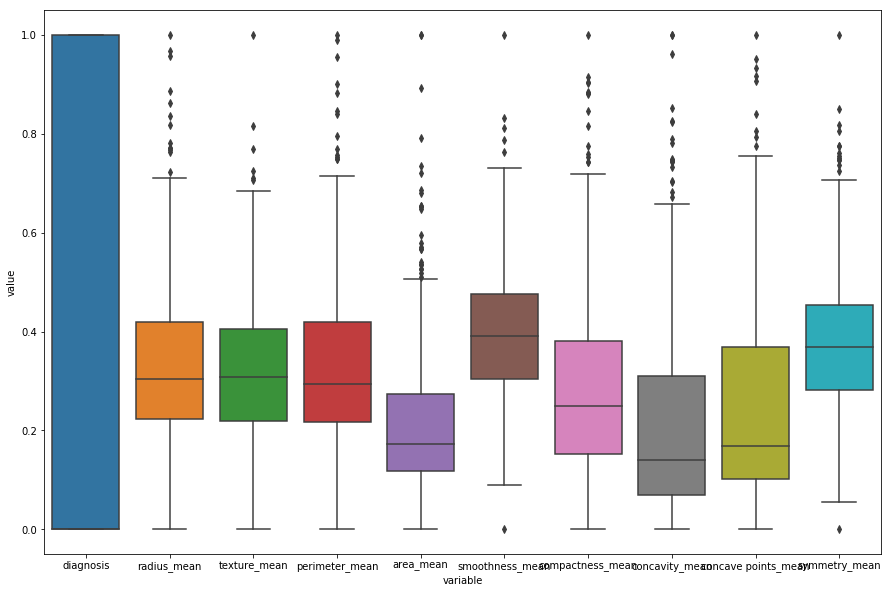

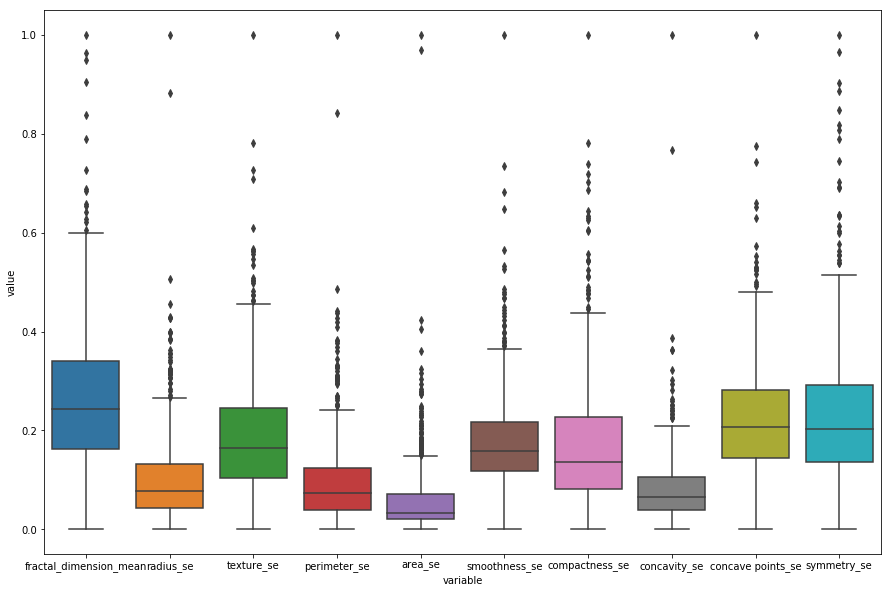

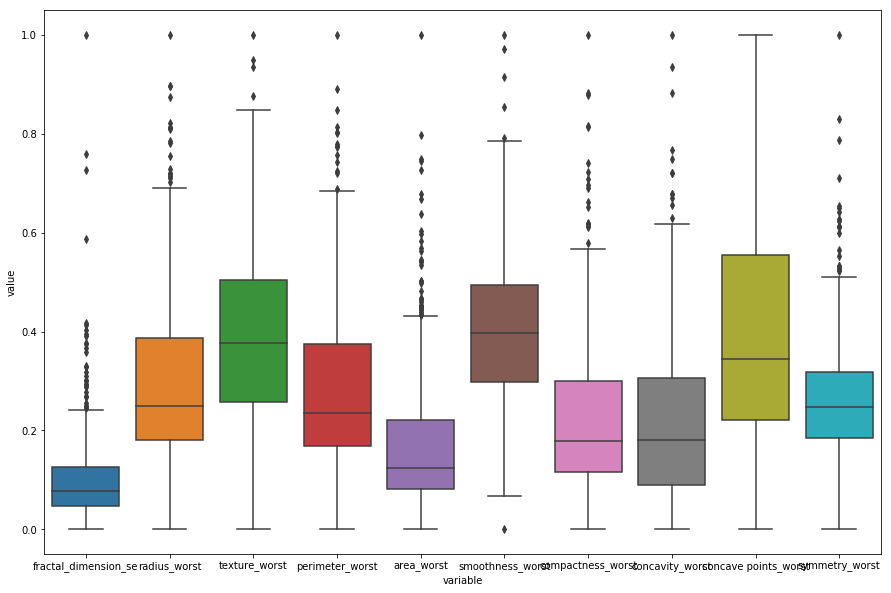

In [91]:
plt.subplots(figsize=(15, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(dstd.iloc[:,0:10]))

plt.subplots(figsize=(15, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(dstd.iloc[:,10:20]))

plt.subplots(figsize=(15, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(dstd.iloc[:,20:30]))


# ML - Model 1 - Decision Tree

In [92]:
dsm=dstd.copy()

In [93]:
dsm.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.884255,0.703140,0.731113,0.686364,...,0.620776,0.151110,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.202931,0.203608,0.348757,0.379798,...,0.606901,0.324132,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.481200,0.462512,0.635686,0.509596,...,0.556386,0.384462,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433


In [94]:
x_train,x_test,y_train,y_test=train_test_split(dsm.drop(labels=['diagnosis'], axis=1),dsm['diagnosis'],test_size=0.3,
    random_state=0)

In [95]:

dTree = DecisionTreeClassifier()  #Create the decision tree classifier object
dTree.fit(x_train, y_train)       #Train the model
y_pred = dTree.predict(x_test)    #Test the model

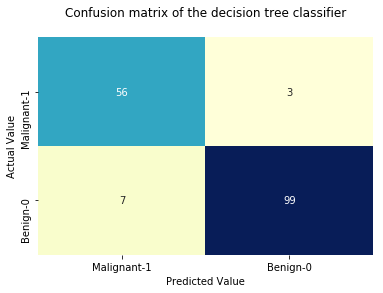

In [96]:

confMx = confusion_matrix(y_test, y_pred)

confMxEdited=confMx.copy()

confMxEdited[0][0]=confMx[1][1]
confMxEdited[0][1]=confMx[1][0]
confMxEdited[1][0]=confMx[0][1]
confMxEdited[1][1]=confMx[0][0]

confMx_dTree = pd.DataFrame(confMxEdited, index = ['Malignant-1','Benign-0'], columns = ['Malignant-1','Benign-0'])

cmplt = plt.subplot()
cmplt.title.set_text('Confusion matrix of the decision tree classifier\n')
sns.heatmap(confMx_dTree,annot=True,fmt="d", cbar=False,cmap="YlGnBu")
cmplt.set_xlabel('Predicted Value');cmplt.set_ylabel('Actual Value');


In [97]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",np.round(metrics.accuracy_score(y_test, y_pred),3))

# Sensitivity - TPR , When it's actually YES, how often does the model predicts YES? 
print("Recall / Sensitivity Score [TPR] :",np.round(metrics.recall_score(y_test, y_pred),3))

# Sensitivity - TNR , When it's actually NO, how often does it predict NO? 
specificity = (confMxEdited[1][1]/(confMxEdited[1][1]+confMxEdited[1][0]))
print("Specificity Score [TNR] :",np.round(specificity,3))

print("F1 Score:",np.round(metrics.recall_score(y_test, y_pred),3))


Accuracy: 0.939
Recall / Sensitivity Score [TPR] : 0.949
Specificity Score [TNR] : 0.934
F1 Score: 0.949


In [98]:
class_names=['B - Benign','M - Malignant']
print(classification_report(y_test, y_pred,target_names=class_names))


               precision    recall  f1-score   support

   B - Benign       0.97      0.93      0.95       106
M - Malignant       0.89      0.95      0.92        59

  avg / total       0.94      0.94      0.94       165



# ML - Model 2- Logistic Regression

In [99]:
dsm=dstd.copy()

In [100]:
dsm.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.884255,0.703140,0.731113,0.686364,...,0.620776,0.151110,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.202931,0.203608,0.348757,0.379798,...,0.606901,0.324132,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.481200,0.462512,0.635686,0.509596,...,0.556386,0.384462,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433


In [102]:
lx_train,lx_test,ly_train,ly_test=train_test_split(dsm.drop(labels=['diagnosis'], axis=1),dsm['diagnosis'],test_size=0.3,
    random_state=0)

In [103]:

logR = LogisticRegression()       #Create the Logistic Regression classifier object
logR.fit(lx_train, ly_train)      #Train the model
ly_pred = logR.predict(lx_test)    #Test the model


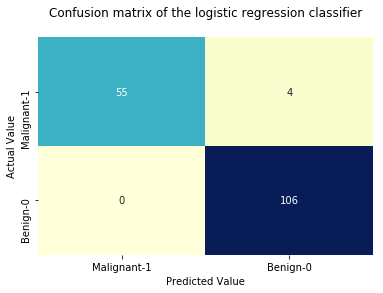

In [104]:

lconfMx = confusion_matrix(ly_test, ly_pred)

lconfMxEdited=lconfMx.copy()

lconfMxEdited[0][0]=lconfMx[1][1]
lconfMxEdited[0][1]=lconfMx[1][0]
lconfMxEdited[1][0]=lconfMx[0][1]
lconfMxEdited[1][1]=lconfMx[0][0]

confMx_logR = pd.DataFrame(lconfMxEdited, index = ['Malignant-1','Benign-0'], columns = ['Malignant-1','Benign-0'])

cmplt = plt.subplot()
cmplt.title.set_text('Confusion matrix of the logistic regression classifier\n')
sns.heatmap(confMx_logR,annot=True,fmt="d", cbar=False,cmap="YlGnBu")
cmplt.set_xlabel('Predicted Value');cmplt.set_ylabel('Actual Value');


In [105]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",np.round(metrics.accuracy_score(ly_test, ly_pred),3))

# Sensitivity - TPR , When it's actually YES, how often does the model predicts YES? 
print("Recall / Sensitivity Score [TPR] :",np.round(metrics.recall_score(ly_test, ly_pred),3))

# Sensitivity - TNR , When it's actually NO, how often does it predict NO? 
specificity = (lconfMxEdited[1][1]/(lconfMxEdited[1][1]+lconfMxEdited[1][0]))
print("Specificity Score [TNR] :",np.round(specificity,3))

print("F1 Score:",np.round(metrics.recall_score(ly_test, ly_pred),3))


Accuracy: 0.976
Recall / Sensitivity Score [TPR] : 0.932
Specificity Score [TNR] : 1.0
F1 Score: 0.932


In [106]:
class_names=['B - Benign','M - Malignant']
print(classification_report(ly_test, ly_pred,target_names=class_names))


               precision    recall  f1-score   support

   B - Benign       0.96      1.00      0.98       106
M - Malignant       1.00      0.93      0.96        59

  avg / total       0.98      0.98      0.98       165



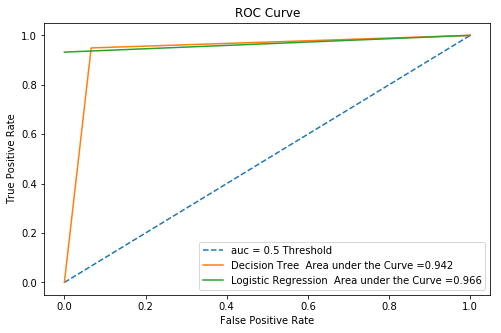

In [107]:
#Plotting ROC Curves

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

lfpr, ltpr, lthresholds = metrics.roc_curve(ly_test, ly_pred)
lauc = metrics.roc_auc_score(ly_test, ly_pred)

x = np.linspace(0, 1)
y = np.linspace(0, 1)
plt.figure(figsize=(8,5))
plt.plot(x, y, linestyle="--", label="auc = 0.5 Threshold")
plt.plot(fpr, tpr, label="Decision Tree  Area under the Curve =" + str(np.round(auc,3)))
plt.plot(lfpr, ltpr, label="Logistic Regression  Area under the Curve =" + str(np.round(lauc,3)))
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
